In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model,Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Conv1D,MaxPooling1D,Flatten
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Comment Classification/data/cleaned_train.csv',delimiter=',',encoding='utf-8')
df.head()

,id,text,text_ws,label
0,train_000000,Dung dc sp tot cam on shop Đóng gói sản phẩm r...,Dung được sản_phẩm tot cam on cửa_hàng Đóng_gó...,0
1,train_000001,Chất lượng sản phẩm tuyệt vời . Son mịn nhưng...,Chất_lượng sản_phẩm tuyệt_vời Son_mịn nhưng kh...,0
2,train_000002,Chất lượng sản phẩm tuyệt vời nhưng k có hộp ...,Chất_lượng sản_phẩm tuyệt_vời nhưng không có h...,0
3,train_000003,:(( Mình hơi thất vọng 1 chút vì mình đã kỳ vọ...,Mình hơi thất_vọng 1 chút vì mình đã kỳ_vọng c...,1
4,train_000004,Lần trước mình mua áo gió màu hồng rất ok mà đ...,Lần trước mình mua áo_gió màu hồng rất tốt mà ...,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of positive and negative messages')

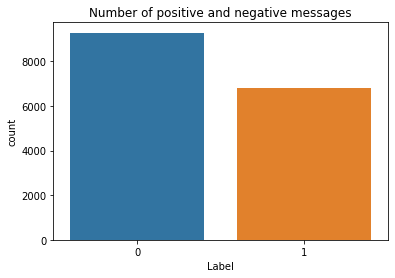

In [3]:
sns.countplot(df.label)
plt.xlabel('Label')
plt.title('Number of positive and negative messages')

In [ ]:
X = df.text_ws
Y = df.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
len(X)

16087

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
top_words = 64000
max_len = 125
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_test = tok.texts_to_sequences(X_test)
sequences_matrix_test = sequence.pad_sequences(sequences_test,maxlen=max_len)

In [ ]:
len(sequences_matrix)

11260

In [ ]:
CNN_odel = Sequential()     
CNN_model.add(Embedding(top_words, 32, input_length=max_words))
CNN_model.add(Conv1D(32, 3, padding='same', activation='relu'))
CNN_model.add(MaxPooling1D())
CNN_model.add(Flatten())
CNN_model.add(Dense(250, activation='relu'))
CNN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
CNN_model.summary()
CNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 125, 32)           2048000   
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 125, 32)           3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 62, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1984)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 250)               496250    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 251       
Total params: 2,547,605
Trainable params: 2,547,605
Non-trainable params: 0
____________________________________________

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/Comment Classification/save_model/vietnamese_comment_classification_model'
model_checkpoint_callback = ModelCheckpoint (
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    verbose = 1,
    save_best_only=True
)

In [ ]:
H = CNN_model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.3,callbacks=[model_checkpoint_callback])

Epoch 1/10
62/62 [==============================] - 3s 50ms/step - loss: 0.2528 - accuracy: 0.8953 - val_loss: 0.3167 - val_accuracy: 0.8653

Epoch 00001: val_accuracy improved from -inf to 0.86534, saving model to /content/drive/MyDrive/Comment Classification/save_model/vietnamese_comment_classification_model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Comment Classification/save_model/vietnamese_comment_classification_model/assets
Epoch 2/10
62/62 [==============================] - 3s 48ms/step - loss: 0.2345 - accuracy: 0.9057 - val_loss: 0.3094 - val_accuracy: 0.8671

Epoch 00002: val_accuracy improved from 0.86534 to 0.86712, saving model to /content/drive/MyDrive/Comment Classification/save_model/vietnamese_comment_classification_model
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Comment Classification/save_model/vietnamese_comment_classification_model/assets
Epoch 3/10
62/62 [==============================] - 3s 49ms/step - loss: 0.2204 - accuracy: 0.9

In [ ]:
score = CNN_model.evaluate(sequences_matrix_test,Y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

151/151 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8571
Test loss:  0.40801525115966797
Test accuracy:  0.8570540547370911


In [ ]:
score = CNN_model.evaluate(sequences_matrix,Y_train)
print('Train loss: ', score[0])
print('Train accuracy: ', score[1])

352/352 [==============================] - 1s 3ms/step - loss: 0.2026 - accuracy: 0.9274
Train loss:  0.20258188247680664
Train accuracy:  0.9273534417152405


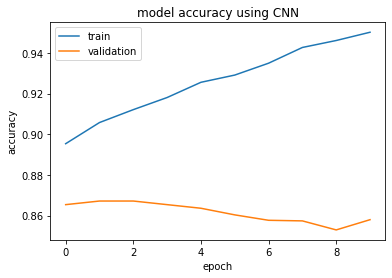

In [ ]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy using CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

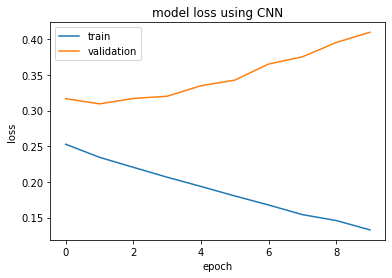

In [ ]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss using CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()